In [134]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
from pandas import Series, DataFrame

# Import and Preview

In [135]:
fraud = pd.read_csv('fraud_data.csv')
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Explore

Check for missing values in data set

In [136]:
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No NULL values in data set

Check basic summary stats

In [137]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [138]:
pd.set_option('display.max_rows', None)
fraud.loc[(fraud['isFraud']==1) & (fraud['isFlaggedFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [139]:
pd.set_option('display.max_rows', None)
fraud.loc[(fraud['isFlaggedFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


# Visualize

In [140]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

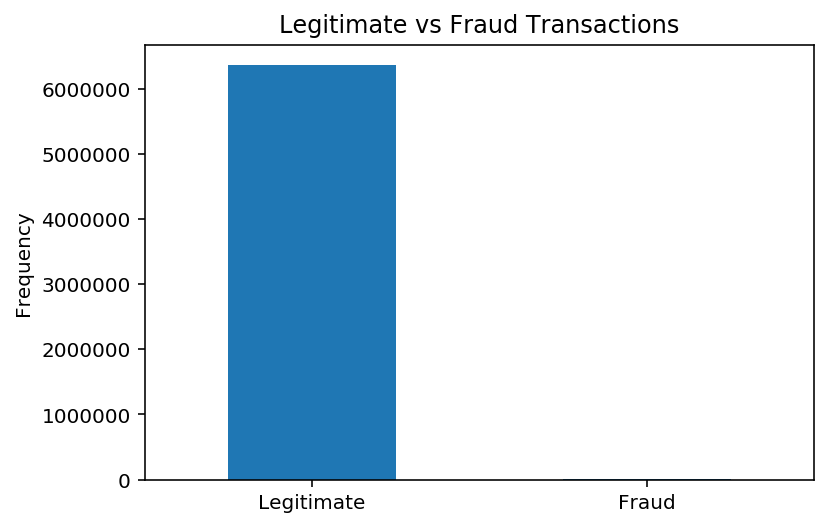

In [141]:
LABELS = ["Legitimate", "Fraud"]
count_classes = pd.value_counts(fraud['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Legitimate vs Fraud Transactions")
plt.xticks(range(2), LABELS)
# plt.xlabel("")
plt.ylabel("Frequency");


In [142]:
# print(f"Number of transactions analyzed: {fraud[]})
print(f"Number of actual fraud cases: {fraud['isFraud'].sum()}")
print(f"Number of transactions flagged as fraud: {fraud['isFlaggedFraud'].sum()}")
print(f"only {round((fraud['isFlaggedFraud'].sum())/(fraud['isFraud'].sum()),3)*100}% of trasactions are being caught")

Number of actual fraud cases: 8213
Number of transactions flagged as fraud: 16
only 0.2% of trasactions are being caught


In [143]:
# frauds = fraud[fraud.isFraud == 1]
# legitimate = fraud[fraud.isFraud == 0]

In [162]:
fraud_amt = fraud.loc[(fraud['isFraud'] == 1) & 
                         (fraud['amount'])]
frauds = fraud.loc[(fraud['isFraud'] == 1)]

In [163]:
fraud_amt['amount'].describe()

count    8.197000e+03
mean     1.470833e+06
std      2.405723e+06
min      6.380000e+01
25%      1.275643e+05
50%      4.422902e+05
75%      1.525742e+06
max      1.000000e+07
Name: amount, dtype: float64

## Distribution of fraud amounts

In [168]:
total_lost = round(fraud_amt['amount'].sum(),2)
total_cases = frauds['isFraud'].sum()
print(f"Toal amount lost to fraud: ${total_lost}")
print(f"Total cases: {total_cases}")

Toal amount lost to fraud: $12056415427.84
Total cases: 8213


(array([3924., 1172.,  688.,  436.,  297.,  260.,  177.,  129.,  116.,
          88.,   66.,   72.,   60.,   48.,   45.,   50.,   42.,   34.,
          51.,   30.,   28.,   24.,   30.,   23.,  307.]),
 array([6.38000000e+01, 4.00061248e+05, 8.00058696e+05, 1.20005614e+06,
        1.60005359e+06, 2.00005104e+06, 2.40004849e+06, 2.80004594e+06,
        3.20004338e+06, 3.60004083e+06, 4.00003828e+06, 4.40003573e+06,
        4.80003318e+06, 5.20003062e+06, 5.60002807e+06, 6.00002552e+06,
        6.40002297e+06, 6.80002042e+06, 7.20001786e+06, 7.60001531e+06,
        8.00001276e+06, 8.40001021e+06, 8.80000766e+06, 9.20000510e+06,
        9.60000255e+06, 1.00000000e+07]),
 <a list of 25 Patch objects>)

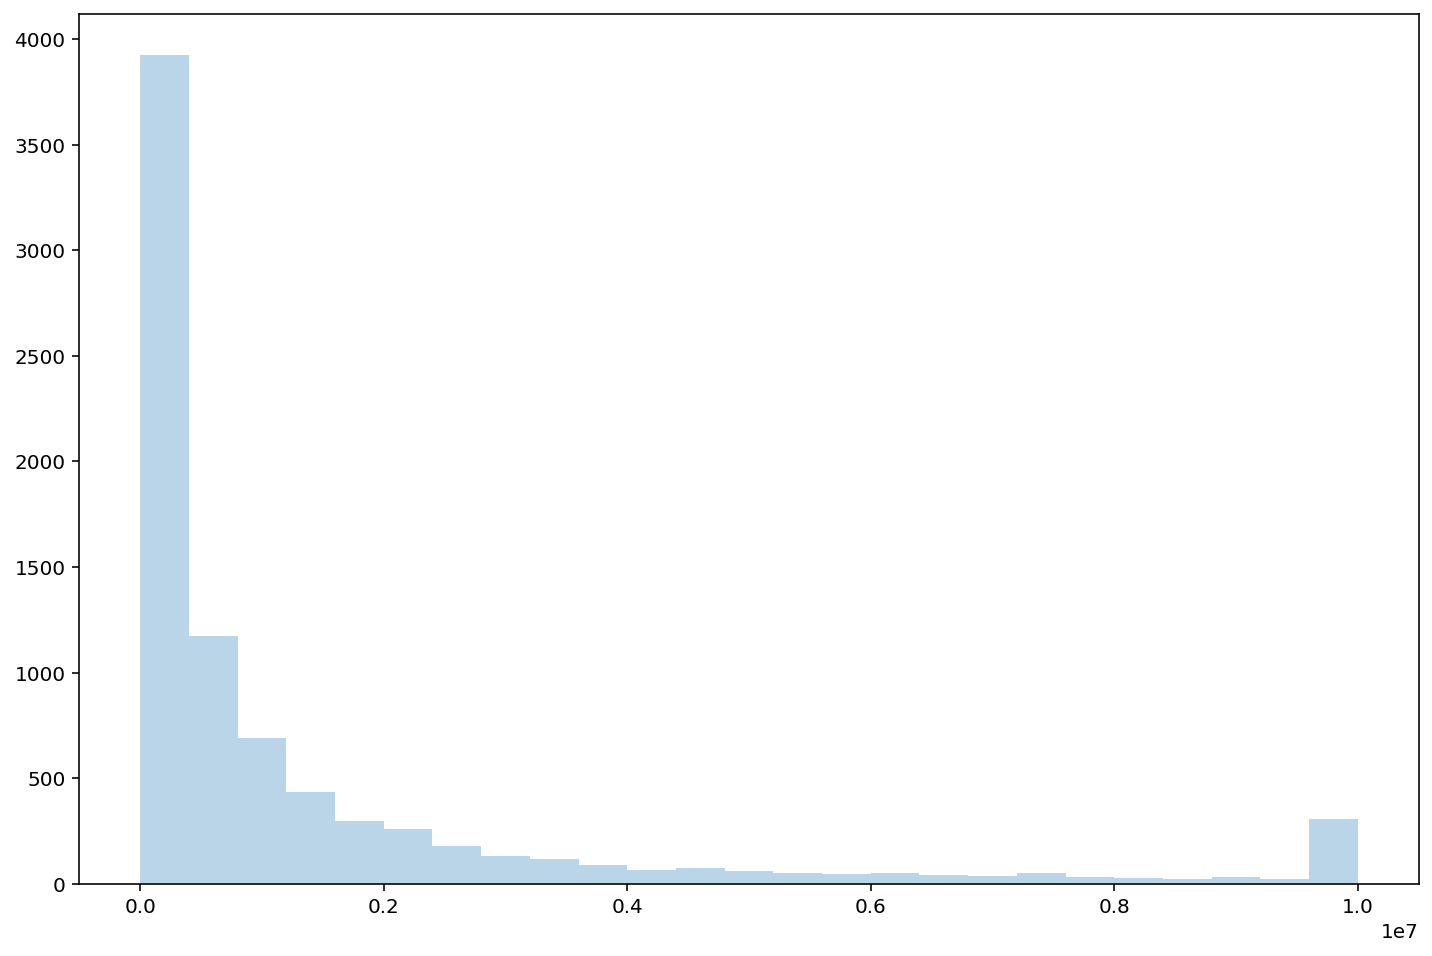

In [166]:
fig=plt.figure(figsize=(12,8))
plt.hist(fraud_amt['amount'],bins=25, alpha=0.3)

The majority of fraud is occuring in the amounts between 0 and 2 million.  Need to examine that range.  However, the spike at the far right end indicates that while still small in frequency by comparison, The amount of money lost in that bin is significant.

#### Greater than 8mil

Total money lost in this range: 3988961407.97
Proportion to total cases: 5.02%
proportion to total($): 33.09%


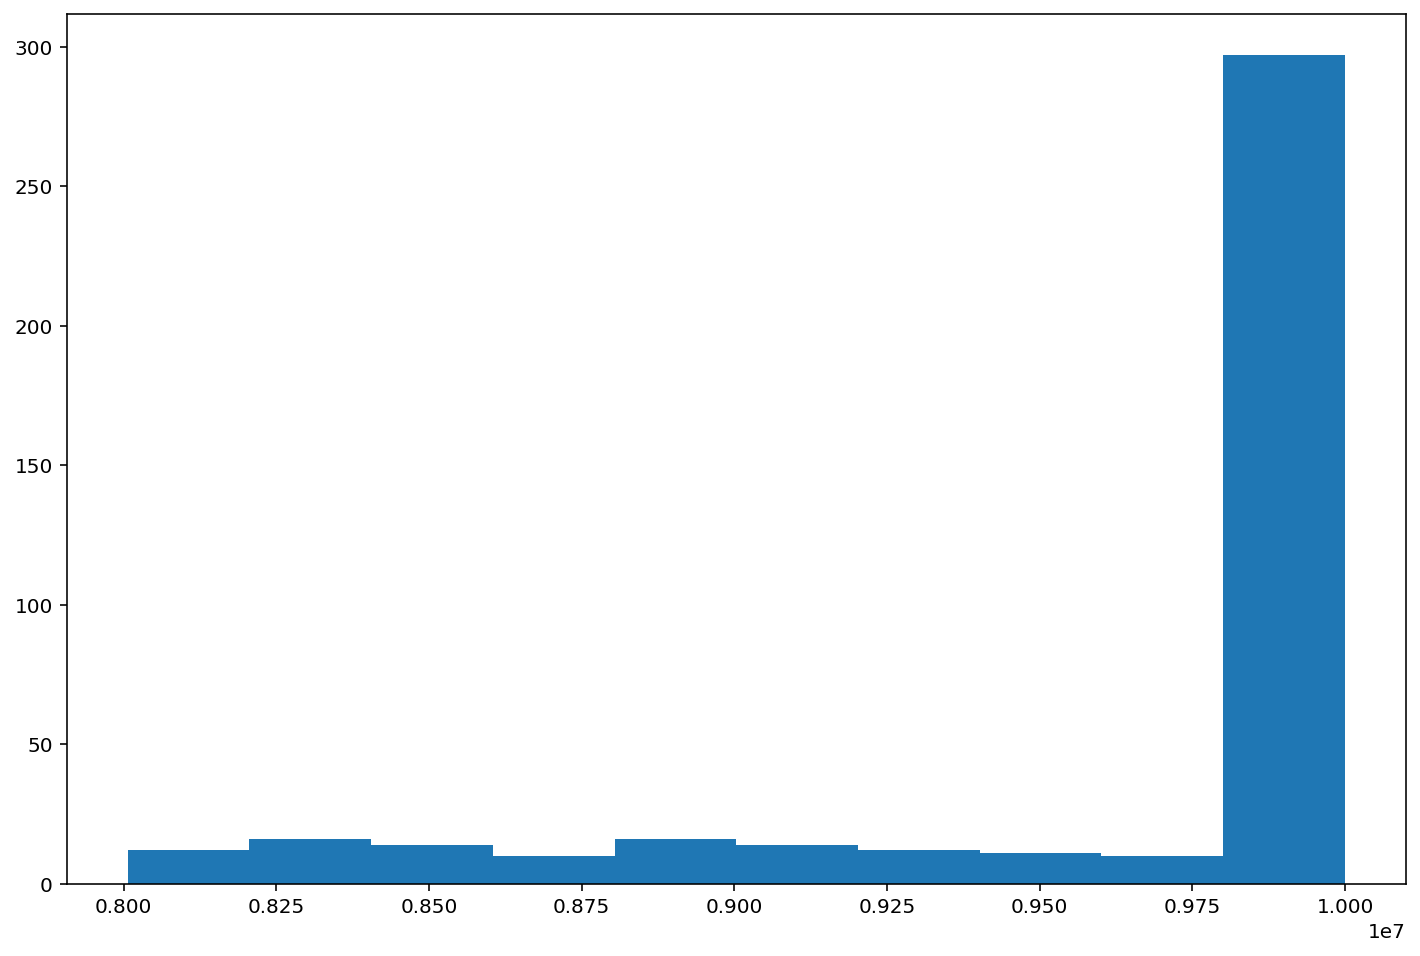

In [180]:
fig=plt.figure(figsize=(12,8))
majority_amt7 = fraud_amt.loc[(fraud_amt['amount'] > 8000000)] 
plt.hist(majority_amt7['amount'])
money_lost = majority_amt7['amount'].sum()
cases1 = majority_amt7['isFraud'].sum()*100
proportion_cases = round((cases1/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

#### Less than 2mil

Total money lost in this range: 3054292829.18
Proportion to total cases: 79.35%
proportion to total($): 25.33%


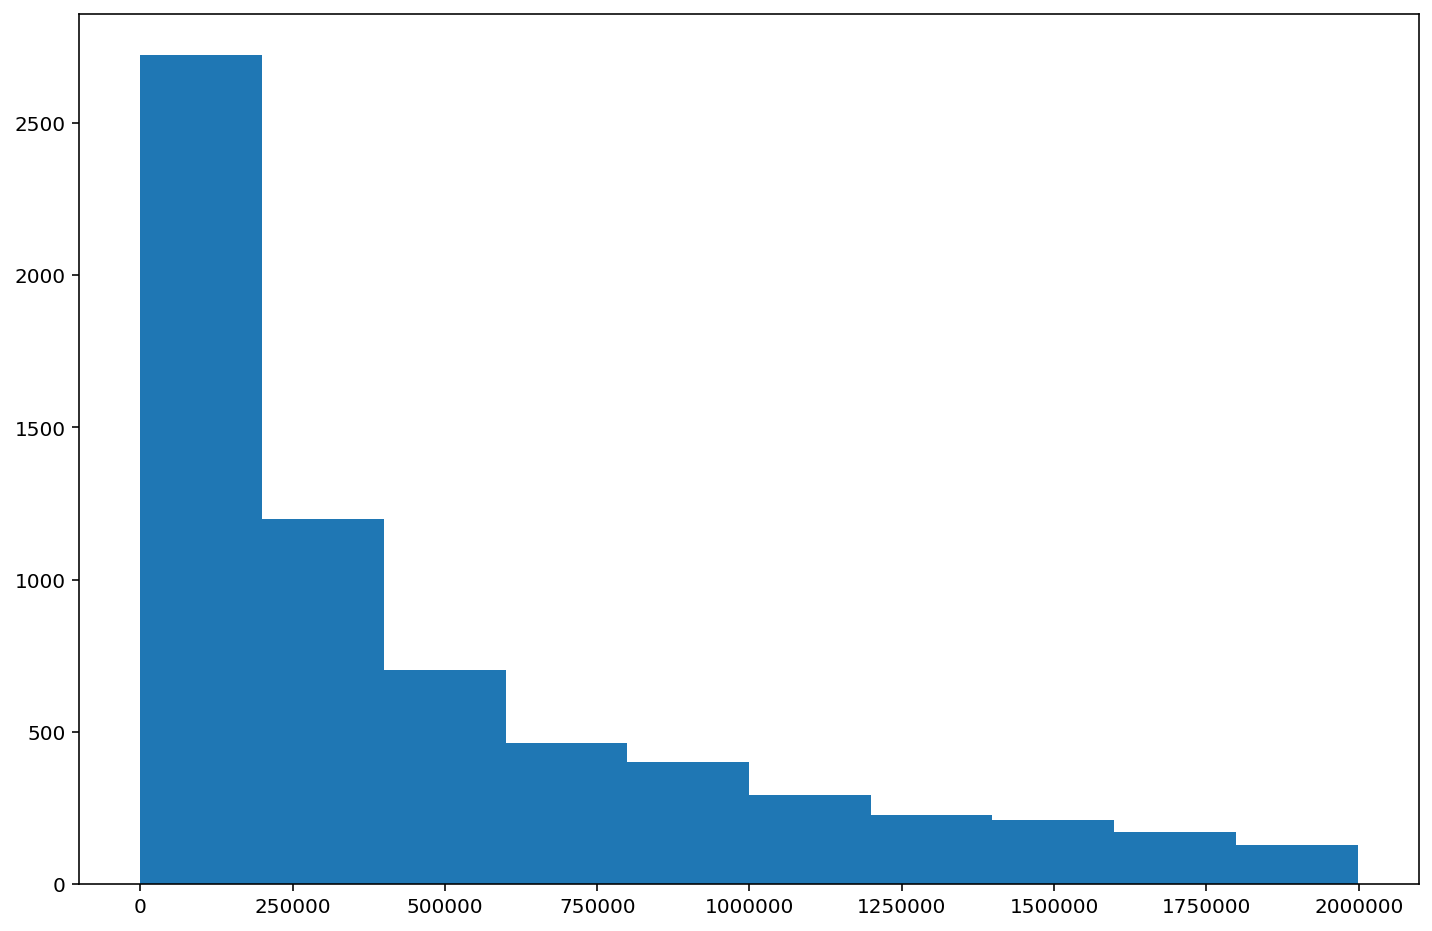

In [181]:
fig=plt.figure(figsize=(12,8))
plt.hist(majority_amt['amount'])
money_lost = majority_amt['amount'].sum()
cases2 = majority_amt['isFraud'].sum()*100
proportion_cases = round((cases2/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

#### Less than 500000

Total money lost in this range: 754389939.72
Proportion to total cases: 52.76%
proportion to total($): 6.26%


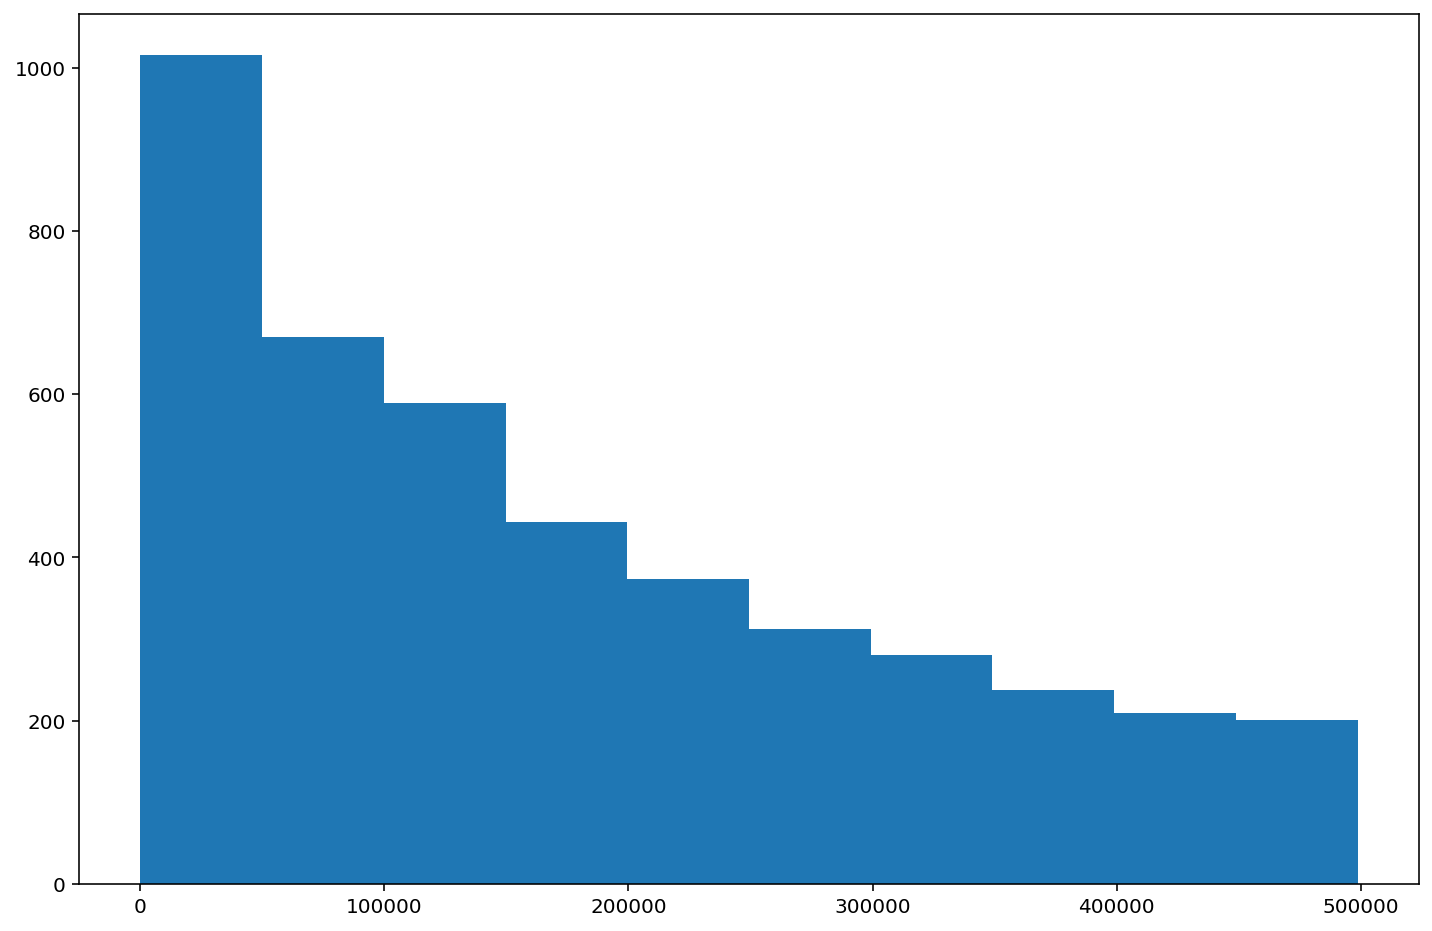

In [182]:
fig=plt.figure(figsize=(12,8))
majority_amt2 = fraud_amt.loc[(fraud_amt['amount'] < 500000)] 
plt.hist(majority_amt2['amount'])
money_lost = majority_amt2['amount'].sum()
cases3 = majority_amt2['isFraud'].sum()*100
proportion_cases = round((cases3/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

#### Less than 200000

Total money lost in this range: 73020052.09
Proportion to total cases: 20.59%
proportion to total($): 0.61%


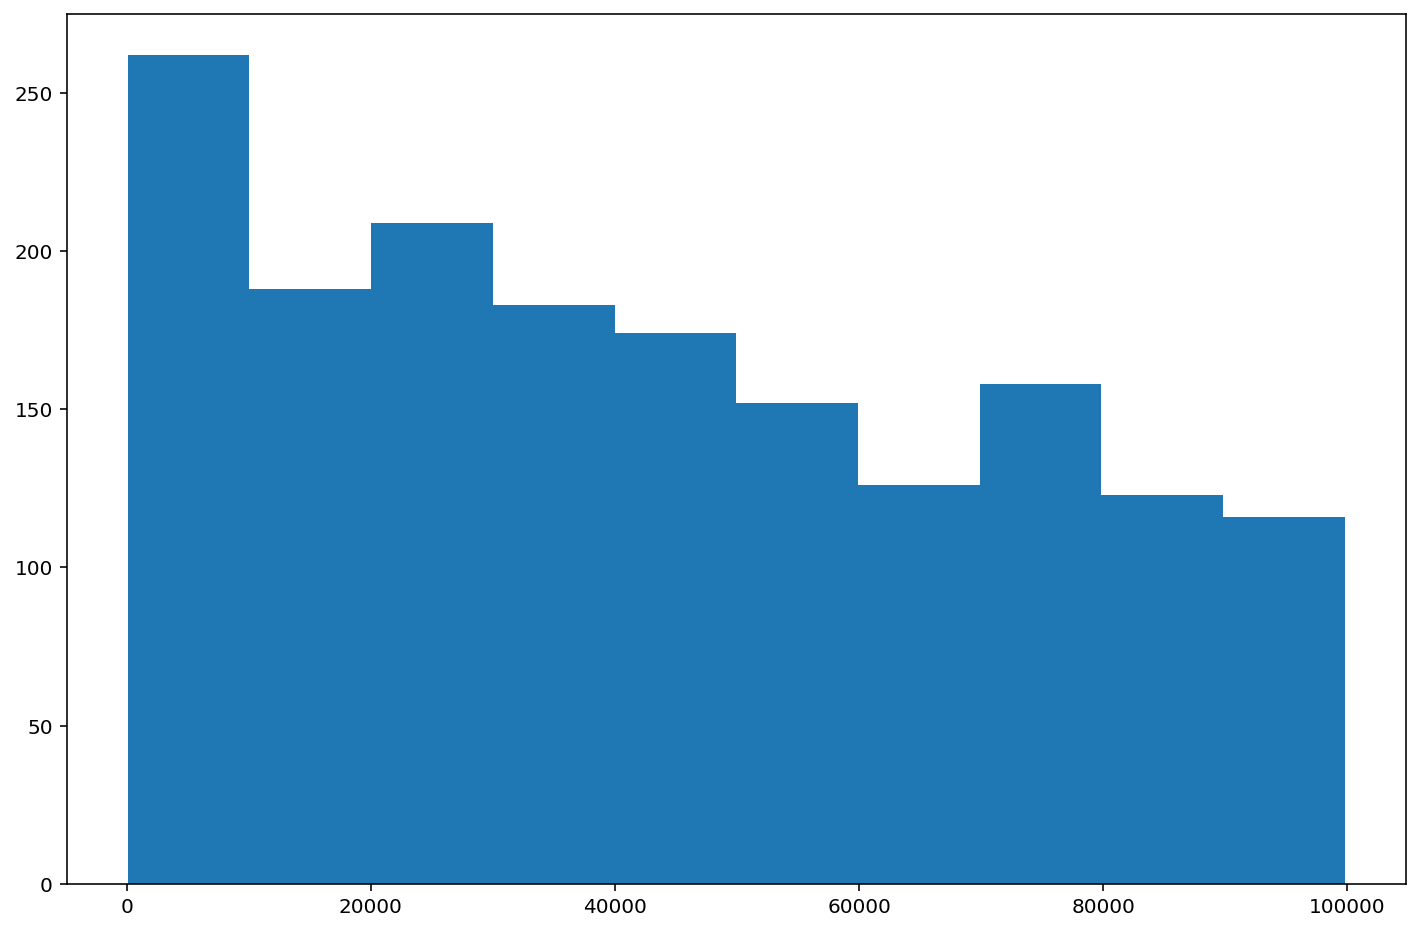

In [184]:
fig=plt.figure(figsize=(12,8))
majority_amt3 = fraud_amt.loc[(fraud_amt['amount'] < 100000)] 
plt.hist(majority_amt3['amount'])
money_lost = majority_amt3['amount'].sum()
cases3 = majority_amt3['isFraud'].sum()*100
proportion_cases = round((cases3/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

#### Less than 20k

In [152]:
# majority_amt4 = fraud_amt.loc[(fraud_amt['amount'] < 20000)] 
# plt.hist(majority_amt4['amount'])
# money_lost = majority_amt4['amount'].sum()
# proportion = round((money_lost/total_lost*100),2) 
# print(f"Total money lost in this range: {money_lost}")
# print(f"proportion to total: {proportion}%")

#### less than 5k

In [153]:
# majority_amt5 = fraud_amt.loc[(fraud_amt['amount'] < 5000)] 
# plt.hist(majority_amt5['amount'])
# money_lost = majority_amt5['amount'].sum()
# proportion = round((money_lost/total_lost*100),2) 
# print(f"Total money lost in this range: {money_lost}")
# print(f"proportion to total: {proportion}%")

#### Less than 1k

In [154]:
# majority_amt6 = fraud_amt.loc[(fraud_amt['amount'] < 1000)] 
# plt.hist(majority_amt6['amount'])
# money_lost = majority_amt6['amount'].sum()
# proportion = round((money_lost/total_lost*100),2) 
# print(f"Total money lost in this range: {money_lost}")
# print(f"proportion to total: {proportion}%")

## Times of day